# Project: Investigate Medical Appointment No shows Dataset


## Table of Contents:

##### Introduction:
###### Data Wrangling
###### Exploratory Data Analysis
###### Conclusions


### project Overview

The presented project is to analyze a dataset and then communicate the findings about it. The project consist of going through the entire data analysis process, starting by posing a question and finishing by sharing the findings.


### Project Data:


Data Set: No-show appointments dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program.
‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Questions:
##### (1)What proportion of appointment shows |no shows?
##### (2) what is the rate of no show by patient sex ?
##### (3) What are the ages of people with diabetes?

## Data Wrangling:

In this section we read the data well and then clean it.


## Loding Dataset:

In [6]:
df = pd.read_csv('noshowappointments (1).csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's see the first 5 lines of the dataset. 
The head method list first N rows from the DataFrame and the method tail, returns the last N row 



## Data Cleaning:

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## General observations:
The dataset have 110527 observations,
14 columns and with no null values. The data types of the variables are divided in 8 integer and 6 object.



## Variables transformations:


To plot some statistical graphics and for better understanding, we make some transformations in the variables:
PatientId : Rename to Patient_id
AppointmentID : Rename to Appointment_id
Gender: Rename to Patient_sex
ScheduledDay:Rename to Scheduled_day
AppointmentDay':Rename to Appointment_day
Hipertension:Rename to Hypertension
handcap:Rename to hindrance

In [7]:
df.rename(columns={'PatientId':'Patient_id','AppointmentID':'Appointment_id','Gender':'Patient_sex',
                     'ScheduledDay':'Scheduled_day','AppointmentDay':'Appointment_day',
                     'Hipertension':'Hypertension','Handcap':'hindrance','No-show':'No_show'}, inplace=True)
df.head(6)

,Patient_id,Appointment_id,Patient_sex,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


The Dataset has 110527 record and 14 columns

In [16]:
for _ in df.columns:
    print(_,sum(df[_].duplicated()))

PatientId 48228
AppointmentID 0
Gender 110525
ScheduledDay 6978
AppointmentDay 110500
Age 110423
Neighbourhood 110446
Scholarship 110525
Hipertension 110525
Diabetes 110525
Alcoholism 110525
Handcap 110522
SMS_received 110525
No-show 110525
classification_by_age 110514


In [17]:
for _ in df.columns:
    print(_,len(df[_].unique()))
    print((df[_].unique()),'\n')

PatientId 62299
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13] 

AppointmentID 110527
[5642903 5642503 5642549 ... 5630692 5630323 5629448] 

Gender 2
['F' 'M'] 

ScheduledDay 103549
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z'] 

AppointmentDay 27
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:

In [7]:
df.shape

(110527, 14)

In [8]:
print(df['Scheduled_day'].dtype)
print(df['Appointment_day'].dtype)

object
object


In [11]:
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'])
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'])

In [29]:
df['Scheduled_day']= df['Scheduled_day'].apply(lambda x:x.strftime('%m-%d-%y'))
df['Scheduled_day'].head(3)

0    04-29-16
1    04-29-16
2    04-29-16
Name: Scheduled_day, dtype: object

In [30]:
df['Appointment_day']= df['Appointment_day'].apply(lambda x:x.strftime('%m-%d-%y'))
df['Appointment_day'].head(3)

0    04-29-16
1    04-29-16
2    04-29-16
Name: Appointment_day, dtype: object

In [31]:
df.head()

,Patient_id,Appointment_id,Patient_sex,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received,No_show
0,2.987250e+13,5642903,F,04-29-16,04-29-16,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,04-29-16,04-29-16,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,04-29-16,04-29-16,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,04-29-16,04-29-16,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,04-29-16,04-29-16,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Greated Appointment_day_of_week ,Scheduled_day_of_week columns

In [32]:
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'])
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'])

In [33]:
df['Appointment_day_of_week'] = df['Appointment_day'].dt.day_name()
df['Appointment_day_of_week'].head(3)

0    Friday
1    Friday
2    Friday
Name: Appointment_day_of_week, dtype: object

In [34]:
df['Scheduled_day_of_week'] = df['Scheduled_day'].dt.day_name()
df['Scheduled_day_of_week'].head(3)

0    Friday
1    Friday
2    Friday
Name: Scheduled_day_of_week, dtype: object

In [35]:
df_table=df.pivot_table(values="Scheduled_day_of_week", index=["No_show"], columns="Appointment_day_of_week",aggfunc=np.count_nonzero)
df_table

Appointment_day_of_week,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
No_show,,,,,,
No,14982,18025,30,13909,20488,20774
Yes,4037,4690,9,3338,5152,5093


Less no show ,show of patients if the appointment is on saturday

In [36]:
df.isnull().sum()

Patient_id                 0
Appointment_id             0
Patient_sex                0
Scheduled_day              0
Appointment_day            0
Age                        0
Neighbourhood              0
Scholarship                0
Hypertension               0
Diabetes                   0
Alcoholism                 0
hindrance                  0
SMS_received               0
No_show                    0
Appointment_day_of_week    0
Scheduled_day_of_week      0
dtype: int64

In [37]:
df.nunique()

Patient_id                  62299
Appointment_id             110527
Patient_sex                     2
Scheduled_day                 111
Appointment_day                27
Age                           104
Neighbourhood                  81
Scholarship                     2
Hypertension                    2
Diabetes                        2
Alcoholism                      2
hindrance                       5
SMS_received                    2
No_show                         2
Appointment_day_of_week         6
Scheduled_day_of_week           6
dtype: int64

In [7]:
df.duplicated().sum()

0

## Notes: 
No duplicate data.
No missing values.

In [12]:
df['Appointment_day'].value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: Appointment_day, dtype: int64

In [13]:
df.head()

,Patient_id,Appointment_id,Patient_sex,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df['No_show'].value_counts()


No     88208
Yes    22319
Name: No_show, dtype: int64

In [15]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [16]:
df['Hypertension'].value_counts()

0    88726
1    21801
Name: Hypertension, dtype: int64

In [18]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [9]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [21]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [22]:
df.describe()


,Patient_id,Appointment_id,Age,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Summary:
Age may have a negative value that is best removed and the age is expected to be between 0 and 1

In [23]:
df.query('Age == -1').Age.count()

1

In [24]:
df['hindrance'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: hindrance, dtype: int64

In [25]:
df['hindrance'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [26]:
hindrance_unwanted = df['hindrance'].value_counts()
total =hindrance_unwanted[2]+hindrance_unwanted[3]+hindrance_unwanted[4]
(total/df.hindrance.count())* 100

0.18004650447401993

The information above discovers that there is only one negative value(-1) in age Also, the percentage of unwanted values with hindrance represents a small percentage of 0.18, and therefore I removed it from the dataset

In [27]:
negative_age = df.query('Age ==-1').index.values
df.drop(negative_age, inplace=True)

In [28]:
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

it is better to remove (age==-1)

In [30]:
hindrance_unwanted = df.query('hindrance== 2 | hindrance == 3 | hindrance == 4').hindrance
# Drop the values from the dataframe
df.drop(hindrance_unwanted.index, inplace=True)

In [31]:
df['hindrance'].value_counts()

0    108285
1      2042
Name: hindrance, dtype: int64

Great job removed ( hindrance== 2 & hindrance=3 & hindrance=4)

done data Wrangling



## Exploratory Data Analysis


1- What proportion of appointment shows no shows?

In [32]:
df['No_show'].value_counts()

No     88049
Yes    22278
Name: No_show, dtype: int64

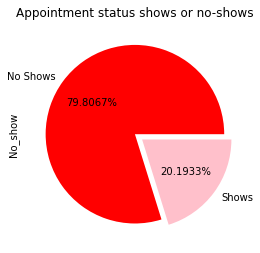

In [11]:
"""
proportion of NoShows as a piechart
"""
df.No_show.value_counts().plot.pie(figsize=(4,6), autopct='%.4f%%', explode=(0, 0.1),colors=['red','pink'],labels =['No Shows', 'Shows'])
plt.title('Appointment status shows or no-shows')
plt.show()

20.19% of all appointments resulted in no shows.

### 2- what is the rate of no show by patient sex ?

In [36]:
missed_ppointment=pd.DataFrame(df.groupby('Patient_sex')['No_show'].count()).apply(lambda x : x / sum(x) * 100)
missed_ppointment

,No_show
Patient_sex,
F,65.015817
M,34.984183


Famel 65% of no show ,but Male 34% of no show


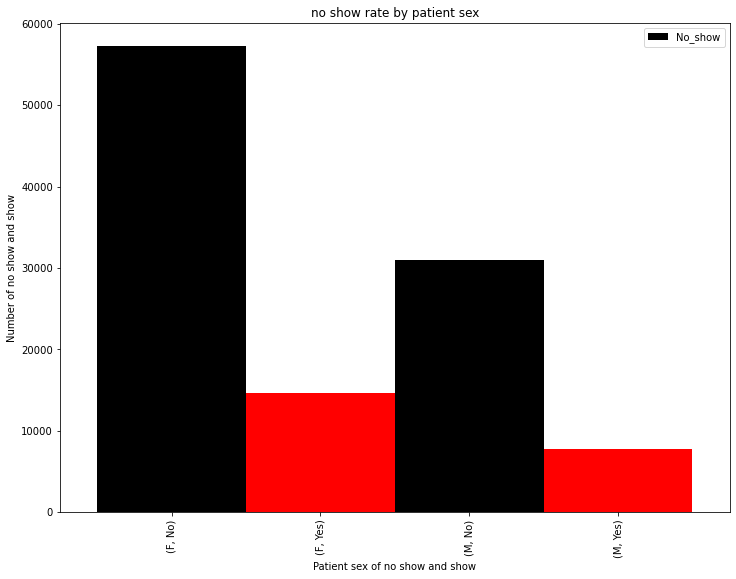

In [12]:
missed_ppointment= df.groupby('Patient_sex').No_show.value_counts().plot(kind='bar',width =1,figsize=(12,9), color=['black','red'])
missed_ppointment.set_title("no show rate by patient sex")
plt.ylabel("Number of no show and show")
plt.xlabel("Patient sex of no show and show")
plt.legend(['No_show','show']);
plt.show()

The number of female who attended the appointment greater than male.
Most of the missing appointments was from female
(F,No) means female show up ,(F,Yes) means female no show

(M,No) means male show up,(M,yes) means male no show

### 3- What are the ages of people with diabetes?

In [17]:
diabetes_by_Patient_id=pd.DataFrame(df.groupby('Diabetes')['Patient_id'].count()).apply(lambda x : x / sum(x) * 100)
diabetes_by_Patient_id

,Patient_id
Diabetes,
0,92.813521
1,7.186479


92.8 Non diabetic of patients and 7.1 diabetics

In [8]:
bins= [0,10,16,21,26,31,36,41,46,51,56,61,150]
labels = ['Less than 10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','More than 60']
df['classification_by_age'] = pd.cut(df['Age'], bins=bins,labels=labels, right=False)
df.groupby(['classification_by_age'])['Diabetes'].count()

classification_by_age
Less than 10    17475
10-15            6993
15-20            7380
20-25            6751
25-30            7032
30-35            7372
35-40            7680
40-45            6902
45-50            7518
50-55            7919
55-60            7742
More than 60    19762
Name: Diabetes, dtype: int64

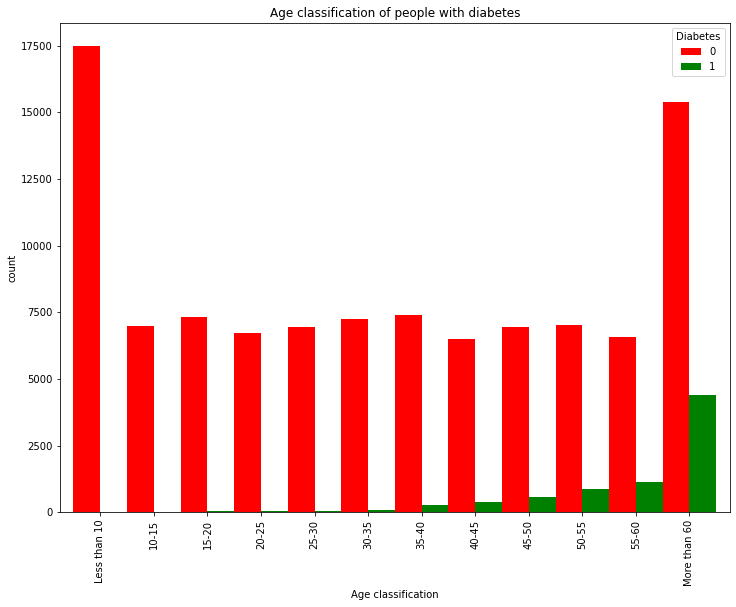

In [9]:
age = df.groupby('classification_by_age')['Diabetes'].value_counts().unstack().plot(kind='bar',width =1,figsize=(12,9), color=['red','green'])
age.set_title("Age classification of people with diabetes")
age.set_xlabel('Age classification')
age.set_ylabel('count')
plt.show()

the highest incidence of diabetes is those at the age of 60



### Introduction:


In this step, we do the following :
1-Importing the needed Libraries that help us achieve our tasks.


### Data Wrangling:


In this step, we do the following :
1-Loading our Dataset.
2-Checking for cleanliness and,edit data type some columns
3-Variables transformations
4-Greated Appointment_day_of_week ,Greated Appointment_day_of_week
5-no duplicate data exists in the dataset.
6-no missing values exist in the provided dataset.
7- age has min value -1 ,It is not expected that age is a negative value, so I think it is better to drop it Also, hindrance have a max value of 4 , hindrance values is expected to be 0 or 1 solution by The information above discovers that there is only one negative value(-1) in age Also, the percentage of unwanted values with hindrance represents a small percentage of 0.18, and therefore I removed it from the dataset

## Exploratory Data Analysis

### 1-	What proportion of appointment shows |no shows? 
finding 79% of the patients are commited to their appointment.
20.19% of all appointments resulted in no shows.

### 2- what is the rate of no show by patient sex ?
Finding number of female who attended the appointment greater than male
and,number of female who didn't attend the appointment greater than male

### 3- What are the ages of people with diabetes?
finding Patients with diabetes between the ages of 30 to More than 60
highest incidence of diabetes is those at the age of 60 or More

#### Age
Mostly infants less than 2 years of age attend the appointment
Waiting Time
#### Gender
More no of males show-up for the appointments
Hipertension and Diabetes
These are the two most important factors which influenced the show-up ratio
#### Month
Most appointments were made in May
#### Day
Wednesday has most sshow-ups and Saturday has the least
#### Hour
The graph is bimodal with 1st peak between 7 and 9 and 2nd peak between 13 and 15. These two time periods have the most show-ups




### Conclusions:

Most of them are obligatory.  20.19% of all appointments to a wedding, a large proportion of the tables, the large length, the large number of the agenda.




### Limitations:
1- data type for Scheduled_day,Appointment_day object ,import convert to datetime type.
2- I found an error with a sensitivity value of negative (-1).
‫